# Project: Investigate the countries data

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> **Tip**: In this section of the report, I will provide a brief introduction to the dataset selected for analysis. At the end of this section, You will find the questions I plan on exploring over the course of the report.

In [1]:
# Import statements for all of the packages that I
#   plan to use.
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
% matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, I will load in the data, check for cleanliness, and then trim and clean the dataset for analysis.

### General Properties

In [2]:
# Load the data and print out a few lines. Perform operations to inspect data

income=pd.read_csv('income_per_person_gdppercapita_ppp_inflation_adjusted.csv')
inflation=pd.read_csv('inflation_annual_percent.csv')
life_exp=pd.read_csv('life_expectancy_years.csv')
population=pd.read_csv('population_total.csv')
suicide=pd.read_csv('suicide_total_deaths.csv')
vccn_safety=pd.read_csv('vccin_sfty_dag.csv')


In [3]:
income.head()

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2031,2032,2033,2034,2035,2036,2037,2038,2039,2040
0,Afghanistan,603,603,603,603,603,603,603,603,603,...,2550,2600,2660,2710,2770,2820,2880,2940,3000,3060
1,Albania,667,667,667,667,667,668,668,668,668,...,19400,19800,20200,20600,21000,21500,21900,22300,22800,23300
2,Algeria,715,716,717,718,719,720,721,722,723,...,14300,14600,14900,15200,15500,15800,16100,16500,16800,17100
3,Andorra,1200,1200,1200,1200,1210,1210,1210,1210,1220,...,73600,75100,76700,78300,79900,81500,83100,84800,86500,88300
4,Angola,618,620,623,626,628,631,634,637,640,...,6110,6230,6350,6480,6610,6750,6880,7020,7170,7310


In [4]:
income.describe()

,1800,1801,1802,1803,1804,1805,1806,1807,1808,1809,...,2031,2032,2033,2034,2035,2036,2037,2038,2039,2040
count,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,...,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000
mean,978.523316,978.948187,980.725389,980.922280,981.911917,982.502591,982.829016,985.419689,980.937824,982.393782,...,23142.378238,23613.119171,24083.461140,24577.430052,25077.678756,25576.476684,26107.564767,26635.953368,27180.512953,27730.725389
std,579.633227,579.915248,582.565512,582.032626,583.963199,584.043985,584.097850,590.514505,578.200194,581.878397,...,23670.673835,24162.379036,24635.072766,25136.440969,25646.475260,26138.360102,26707.571366,27233.418469,27813.430077,28356.570830
min,250.000000,250.000000,249.000000,249.000000,249.000000,249.000000,248.000000,248.000000,248.000000,248.000000,...,557.000000,566.000000,577.000000,588.000000,600.000000,612.000000,625.000000,637.000000,650.000000,664.000000
25%,592.000000,592.000000,592.000000,592.000000,592.000000,593.000000,593.000000,593.000000,593.000000,593.000000,...,5180.000000,5280.000000,5380.000000,5490.000000,5600.000000,5710.000000,5830.000000,5950.000000,6070.000000,6190.000000
50%,817.000000,822.000000,826.000000,831.000000,836.000000,836.000000,836.000000,836.000000,836.000000,836.000000,...,15400.000000,15700.000000,16000.000000,16400.000000,16700.000000,17000.000000,17400.000000,17700.000000,18100.000000,18500.000000
75%,1160.000000,1170.000000,1170.000000,1170.000000,1170.000000,1170.000000,1170.000000,1170.000000,1160.000000,1170.000000,...,34200.000000,34800.000000,35500.000000,36200.000000,37000.000000,37700.000000,38500.000000,39300.000000,40100.000000,40900.000000
max,3840.000000,3840.000000,3840.000000,3840.000000,3840.000000,3840.000000,3840.000000,3840.000000,3840.000000,3840.000000,...,149000.000000,153000.000000,156000.000000,159000.000000,162000.000000,165000.000000,169000.000000,172000.000000,176000.000000,179000.000000


### Based on the numbers above, we can see clearly that the mean income of the human has increased significantly, it only shows the effect of things like capitalism and civilization on how we seek money.

In [5]:
inflation.head()

,country,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.03810,0.16600,0.07300,0.04820,0.00567,0.02450,0.05100,0.0195,0.00618,0.02240
1,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.04490,0.02310,0.01040,0.00289,0.01550,0.00564,-0.00632,0.0145,0.01360,0.00382
2,Algeria,0.0347,0.0235,0.00549,0.017,0.015,0.0182,0.0131,0.0314,0.0192,...,0.16100,0.18200,0.07460,-0.00094,-0.00301,-0.06460,0.01550,0.0470,0.07560,-0.00651
3,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.00374,0.00197,0.00175,0.00448,-0.00084,0.00661,0.00348,0.0114,0.01010,0.01510
4,Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.31700,0.31800,0.07260,0.02840,0.03560,-0.03520,0.21800,0.2260,0.29100,0.35900


In [6]:
inflation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 60 columns):
country    193 non-null object
1961       90 non-null float64
1962       92 non-null float64
1963       92 non-null float64
1964       92 non-null float64
1965       92 non-null float64
1966       96 non-null float64
1967       100 non-null float64
1968       101 non-null float64
1969       103 non-null float64
1970       103 non-null float64
1971       115 non-null float64
1972       115 non-null float64
1973       115 non-null float64
1974       115 non-null float64
1975       117 non-null float64
1976       120 non-null float64
1977       121 non-null float64
1978       125 non-null float64
1979       125 non-null float64
1980       126 non-null float64
1981       136 non-null float64
1982       140 non-null float64
1983       142 non-null float64
1984       142 non-null float64
1985       143 non-null float64
1986       145 non-null float64
1987       147 non-null float64
1988  

In [7]:
inflation.describe()

,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
count,90.000000,92.000000,92.000000,92.000000,92.000000,96.000000,100.000000,101.000000,103.000000,103.000000,...,189.000000,189.000000,188.000000,188.000000,189.000000,188.000000,187.000000,187.000000,186.000000,175.000000
mean,0.038053,0.057063,0.078100,0.078277,0.081242,0.049736,0.068562,0.071669,0.055779,0.054340,...,0.069570,0.083183,0.056197,0.040278,0.033310,0.020751,0.032644,0.050428,0.049523,0.032573
std,0.059673,0.205311,0.197930,0.169131,0.253968,0.146560,0.197854,0.180261,0.064915,0.091667,...,0.083693,0.084315,0.081098,0.074786,0.067133,0.088063,0.059057,0.061232,0.067644,0.058528
min,-0.113000,-0.099900,-0.203000,-0.087400,-0.030600,-0.987000,-0.058500,-0.086900,-0.038500,-0.244000,...,-0.190000,-0.016700,-0.029400,-0.218000,-0.267000,-0.297000,-0.134000,-0.032000,-0.028500,-0.074100
25%,0.013275,0.005225,0.009347,0.017825,0.015375,0.020175,0.004625,0.013300,0.021750,0.020100,...,0.015500,0.025500,0.015225,0.008612,0.004620,0.001827,0.006300,0.015150,0.013900,0.008765
50%,0.029650,0.023900,0.031900,0.033750,0.032700,0.040350,0.027750,0.032700,0.041100,0.048400,...,0.044400,0.062500,0.036200,0.023600,0.020500,0.020900,0.018700,0.036200,0.027850,0.022500
75%,0.053200,0.042900,0.058575,0.061675,0.056250,0.060600,0.056250,0.057900,0.068950,0.074850,...,0.101000,0.122000,0.072700,0.049625,0.050700,0.046625,0.049300,0.061550,0.054500,0.039800
max,0.313000,1.790000,1.460000,1.150000,2.290000,0.723000,1.650000,1.230000,0.402000,0.513000,...,0.459000,0.710000,0.753000,0.530000,0.404000,0.425000,0.411000,0.431000,0.469000,0.515000


In [8]:
population.head()

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2091,2092,2093,2094,2095,2096,2097,2098,2099,2100
0,Afghanistan,3280000,3280000,3280000,3280000,3280000,3280000,3280000,3280000,3280000,...,76600000,76400000,76300000,76100000,76000000,75800000,75600000,75400000,75200000,74900000
1,Albania,400000,402000,404000,405000,407000,409000,411000,413000,414000,...,1330000,1300000,1270000,1250000,1220000,1190000,1170000,1140000,1110000,1090000
2,Algeria,2500000,2510000,2520000,2530000,2540000,2550000,2560000,2560000,2570000,...,70400000,70500000,70500000,70600000,70700000,70700000,70700000,70700000,70700000,70700000
3,Andorra,2650,2650,2650,2650,2650,2650,2650,2650,2650,...,63000,62900,62900,62800,62700,62700,62600,62500,62500,62400
4,Angola,1570000,1570000,1570000,1570000,1570000,1570000,1570000,1570000,1570000,...,168000000,170000000,172000000,175000000,177000000,179000000,182000000,184000000,186000000,188000000


In [9]:
population.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Columns: 302 entries, country to 2100
dtypes: int64(301), object(1)
memory usage: 460.2+ KB


In [10]:
population.describe()

,1800,1801,1802,1803,1804,1805,1806,1807,1808,1809,...,2091,2092,2093,2094,2095,2096,2097,2098,2099,2100
count,1.950000e+02,1.950000e+02,1.950000e+02,1.950000e+02,1.950000e+02,1.950000e+02,1.950000e+02,1.950000e+02,1.950000e+02,1.950000e+02,...,1.950000e+02,1.950000e+02,1.950000e+02,1.950000e+02,1.950000e+02,1.950000e+02,1.950000e+02,1.950000e+02,1.950000e+02,1.950000e+02
mean,5.038229e+06,5.055872e+06,5.074643e+06,5.092072e+06,5.105055e+06,5.128710e+06,5.143516e+06,5.167424e+06,5.186405e+06,5.199982e+06,...,5.528046e+07,5.535238e+07,5.540466e+07,5.546472e+07,5.545987e+07,5.554347e+07,5.555948e+07,5.558613e+07,5.555776e+07,5.559454e+07
std,2.779946e+07,2.792217e+07,2.802129e+07,2.814397e+07,2.820672e+07,2.836602e+07,2.842957e+07,2.858907e+07,2.871284e+07,2.877567e+07,...,1.538179e+08,1.535317e+08,1.533571e+08,1.530868e+08,1.524209e+08,1.525998e+08,1.519851e+08,1.516808e+08,1.510089e+08,1.508515e+08
min,9.050000e+02,9.050000e+02,9.050000e+02,9.050000e+02,9.050000e+02,9.050000e+02,9.050000e+02,9.050000e+02,9.050000e+02,9.050000e+02,...,7.890000e+02,7.900000e+02,7.900000e+02,7.910000e+02,7.910000e+02,7.930000e+02,7.960000e+02,7.960000e+02,7.950000e+02,7.970000e+02
25%,1.285000e+05,1.285000e+05,1.285000e+05,1.290000e+05,1.290000e+05,1.290000e+05,1.275000e+05,1.270000e+05,1.270000e+05,1.270000e+05,...,2.125000e+06,2.130000e+06,2.130000e+06,2.125000e+06,2.110000e+06,2.090000e+06,2.075000e+06,2.060000e+06,2.040000e+06,2.025000e+06
50%,6.370000e+05,6.370000e+05,6.370000e+05,6.370000e+05,6.370000e+05,6.370000e+05,6.370000e+05,6.370000e+05,6.370000e+05,6.370000e+05,...,1.090000e+07,1.090000e+07,1.090000e+07,1.100000e+07,1.100000e+07,1.100000e+07,1.100000e+07,1.100000e+07,1.100000e+07,1.100000e+07
75%,2.200000e+06,2.200000e+06,2.195000e+06,2.195000e+06,2.195000e+06,2.175000e+06,2.145000e+06,2.145000e+06,2.145000e+06,2.145000e+06,...,4.745000e+07,4.755000e+07,4.765000e+07,4.755000e+07,4.720000e+07,4.685000e+07,4.655000e+07,4.655000e+07,4.655000e+07,4.660000e+07
max,3.300000e+08,3.320000e+08,3.330000e+08,3.350000e+08,3.360000e+08,3.380000e+08,3.390000e+08,3.410000e+08,3.430000e+08,3.440000e+08,...,1.510000e+09,1.500000e+09,1.500000e+09,1.490000e+09,1.480000e+09,1.480000e+09,1.470000e+09,1.460000e+09,1.450000e+09,1.450000e+09


### Nothin is grwoing so fast in this list like the population of the human race on our planet earth. This growth is only going to increase based on the numbers and forecasts available till the end of the century

In [11]:
suicide.head()

,country,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,Afghanistan,703.00,754.00,820.00,894.00,977.00,1050.00,1100.00,1130.00,1170.00,...,1680.00,1710.00,1750.00,1760.00,1810.00,1870.00,1990.00,2080.00,2170.00,2250.00
1,Albania,127.00,130.00,131.00,135.00,136.00,142.00,150.00,162.00,170.00,...,204.00,205.00,201.00,195.00,191.00,188.00,186.00,184.00,183.00,181.00
2,Algeria,806.00,822.00,843.00,866.00,888.00,912.00,941.00,983.00,1020.00,...,1240.00,1250.00,1270.00,1290.00,1310.00,1340.00,1370.00,1410.00,1420.00,1440.00
3,Andorra,5.45,5.82,6.18,6.33,6.36,6.17,6.04,6.28,6.24,...,7.39,7.53,7.67,7.76,7.85,7.92,7.97,7.72,7.78,7.84
4,Angola,645.00,653.00,667.00,700.00,735.00,756.00,738.00,738.00,816.00,...,1040.00,1060.00,1080.00,1100.00,1120.00,1140.00,1170.00,1200.00,1220.00,1230.00


In [12]:
suicide.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 28 columns):
country    187 non-null object
1990       187 non-null float64
1991       187 non-null float64
1992       187 non-null float64
1993       187 non-null float64
1994       187 non-null float64
1995       187 non-null float64
1996       187 non-null float64
1997       187 non-null float64
1998       187 non-null float64
1999       187 non-null float64
2000       187 non-null float64
2001       187 non-null float64
2002       187 non-null float64
2003       187 non-null float64
2004       187 non-null float64
2005       187 non-null float64
2006       187 non-null float64
2007       187 non-null float64
2008       187 non-null float64
2009       187 non-null float64
2010       187 non-null float64
2011       187 non-null float64
2012       187 non-null float64
2013       187 non-null float64
2014       187 non-null float64
2015       187 non-null float64
2016       187 non-null float64


In [13]:
suicide.describe()

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
count,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,...,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000
mean,4074.538503,4169.940802,4279.694866,4417.736257,4542.970160,4585.298556,4564.679091,4552.603369,4545.235615,4558.306578,...,4433.014278,4397.217754,4352.416150,4327.259679,4305.187380,4293.176364,4284.953583,4303.230160,4323.959412,4344.799572
std,21423.074074,21940.033645,22361.992524,22817.941485,23277.234888,23262.770998,23026.742231,22856.921623,22568.513031,22238.748352,...,20713.369677,20389.090124,20125.965177,19965.696267,19957.130307,19948.307671,19896.778572,20015.263132,20026.707553,19977.059414
min,1.270000,1.300000,1.320000,1.340000,1.360000,1.410000,1.440000,1.490000,1.610000,1.640000,...,1.930000,1.980000,2.020000,2.070000,2.120000,2.040000,2.030000,2.100000,2.110000,2.130000
25%,119.000000,122.500000,125.000000,127.000000,130.000000,133.500000,144.500000,146.500000,145.500000,144.500000,...,173.000000,176.500000,177.500000,178.000000,180.500000,185.000000,185.000000,184.000000,183.500000,183.000000
50%,471.000000,493.000000,507.000000,539.000000,545.000000,572.000000,549.000000,573.000000,577.000000,580.000000,...,615.000000,616.000000,615.000000,615.000000,623.000000,630.000000,645.000000,648.000000,651.000000,671.000000
75%,1820.000000,1900.000000,1900.000000,1875.000000,1910.000000,1905.000000,1900.000000,1910.000000,1940.000000,1995.000000,...,1980.000000,2030.000000,2055.000000,2060.000000,2060.000000,2080.000000,2095.000000,2135.000000,2200.000000,2250.000000
max,237000.000000,242000.000000,245000.000000,247000.000000,249000.000000,246000.000000,241000.000000,236000.000000,229000.000000,218000.000000,...,217000.000000,216000.000000,216000.000000,217000.000000,222000.000000,226000.000000,227000.000000,230000.000000,231000.000000,230000.000000


In [14]:
vccn_safety.head()

,country,2015,2016,2017,2018
0,Afghanistan,0.085,NaN,NaN,0.045
1,Albania,NaN,NaN,NaN,0.158
2,Algeria,0.045,NaN,NaN,0.113
3,Argentina,0.012,NaN,NaN,0.048
4,Armenia,0.216,NaN,NaN,0.206


In [15]:
vccn_safety.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 5 columns):
country    144 non-null object
2015       67 non-null float64
2016       0 non-null float64
2017       0 non-null float64
2018       141 non-null float64
dtypes: float64(4), object(1)
memory usage: 5.7+ KB


> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).

### Data Cleaning
#### 1- Transforming the suicide columns to int rather than float
#### 2- deleting the 2016 & 2017 columns in vccn_safety because there are no inputs there

In [16]:
# 1- Transforming the suicide columns to int rather than float
for col in suicide.columns[1:]:
    suicide[col]=suicide[col].astype(int)

In [17]:
suicide.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 28 columns):
country    187 non-null object
1990       187 non-null int64
1991       187 non-null int64
1992       187 non-null int64
1993       187 non-null int64
1994       187 non-null int64
1995       187 non-null int64
1996       187 non-null int64
1997       187 non-null int64
1998       187 non-null int64
1999       187 non-null int64
2000       187 non-null int64
2001       187 non-null int64
2002       187 non-null int64
2003       187 non-null int64
2004       187 non-null int64
2005       187 non-null int64
2006       187 non-null int64
2007       187 non-null int64
2008       187 non-null int64
2009       187 non-null int64
2010       187 non-null int64
2011       187 non-null int64
2012       187 non-null int64
2013       187 non-null int64
2014       187 non-null int64
2015       187 non-null int64
2016       187 non-null int64
dtypes: int64(27), object(1)
memory usage: 41.0+ KB


In [18]:
# 2- deleting the 2016 & 2017 columns in vccn_safety because there are no inputs there
vccn_safety.drop(['2016','2017'], axis=1,inplace=True)

In [19]:
vccn_safety.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 3 columns):
country    144 non-null object
2015       67 non-null float64
2018       141 non-null float64
dtypes: float64(2), object(1)
memory usage: 3.5+ KB


<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that I've trimmed and cleaned my data, I am ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that I posed in the Introduction section.

### Research Question 1: what is the biggest and lowest five countries in income and population?

In [20]:
# Exploring my data.
population.sort_values(by=['2020']).head(5)

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2091,2092,2093,2094,2095,2096,2097,2098,2099,2100
73,Holy See,905,905,905,905,905,905,905,905,905,...,789,790,790,791,791,793,796,796,795,797
120,Nauru,1830,1830,1830,1830,1830,1830,1830,1830,1830,...,7070,6940,6790,6660,6510,6370,6230,6090,5940,5790
181,Tuvalu,2500,2500,2500,2500,2500,2500,2500,2500,2500,...,19800,19800,19800,19900,19900,19900,20000,20000,20000,20000
132,Palau,3880,3880,3880,3880,3880,3880,3880,3880,3880,...,14900,14800,14700,14700,14600,14500,14500,14400,14300,14300
146,San Marino,5490,5490,5490,5490,5490,5490,5490,5490,5490,...,29900,29800,29800,29800,29800,29700,29700,29700,29700,29700


### We can see that Holy See (Vatican) has the lowest population in the world with only less than a thousand people.

In [21]:
population.sort_values(by=['2020'],ascending=False).head(5)

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2091,2092,2093,2094,2095,2096,2097,2098,2099,2100
35,China,330000000,332000000,333000000,335000000,336000000,338000000,339000000,341000000,343000000,...,1110000000,1110000000,1100000000,1100000000,1090000000,1090000000,1080000000,1080000000,1070000000,1060000000
77,India,201000000,201000000,202000000,202000000,202000000,203000000,203000000,204000000,204000000,...,1510000000,1500000000,1500000000,1490000000,1480000000,1480000000,1470000000,1460000000,1450000000,1450000000
186,United States,6000000,6110000,6230000,6350000,6470000,6590000,6720000,6840000,6970000,...,425000000,426000000,427000000,428000000,429000000,430000000,431000000,432000000,433000000,434000000
78,Indonesia,16100000,16200000,16200000,16200000,16300000,16300000,16400000,16400000,16400000,...,328000000,328000000,327000000,326000000,325000000,324000000,324000000,323000000,322000000,321000000
131,Pakistan,13100000,13100000,13200000,13200000,13200000,13200000,13300000,13300000,13300000,...,405000000,405000000,405000000,405000000,404000000,404000000,404000000,404000000,403000000,403000000


In [22]:
f=population[['country','2020']].sort_values(by='2020').tail(10)

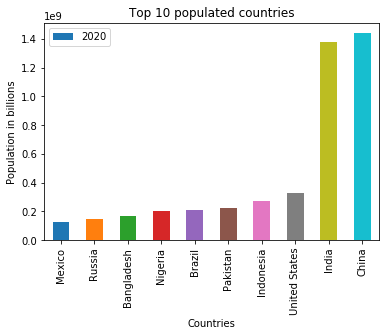

In [23]:
f.plot(x = "country", y = "2020", kind = "bar")
plt.title("Top 10 populated countries")
plt.xlabel("Countries")
plt.ylabel("Population in billions");

### We can see that both China and India are by far the most populated countries in the world with about 1.4 billions people in 2020

In [24]:
income.sort_values(by=['2020']).head(5)

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2031,2032,2033,2034,2035,2036,2037,2038,2039,2040
27,Burundi,418,418,419,419,420,420,420,421,421,...,557,566,577,588,600,612,625,637,650,664
155,Somalia,694,694,695,696,696,697,698,698,699,...,732,746,761,776,792,808,825,842,859,876
32,Central African Republic,424,424,424,424,424,424,424,425,425,...,1090,1120,1140,1160,1190,1210,1240,1260,1290,1310
38,"Congo, Dem. Rep.",485,487,489,491,493,495,497,499,501,...,1000,1020,1040,1060,1090,1110,1130,1150,1180,1200
123,Niger,446,446,446,446,446,446,446,447,447,...,1340,1360,1390,1420,1450,1480,1510,1540,1570,1600


In [25]:
income.sort_values(by=['2020'],ascending=False).head(5)

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2031,2032,2033,2034,2035,2036,2037,2038,2039,2040
139,Qatar,1100,1100,1110,1110,1110,1120,1120,1130,1130,...,149000,153000,156000,159000,162000,165000,169000,172000,176000,179000
98,Luxembourg,1450,1450,1450,1450,1450,1450,1450,1450,1450,...,107000,109000,111000,114000,116000,118000,121000,123000,126000,128000
151,Singapore,1020,1020,1020,1020,1020,1020,1020,1020,1020,...,111000,113000,115000,117000,120000,122000,125000,127000,130000,133000
24,Brunei,1510,1510,1510,1510,1510,1510,1510,1510,1510,...,89600,91300,93200,95000,97000,98900,101000,103000,105000,107000
80,Ireland,1460,1470,1480,1490,1500,1510,1520,1530,1550,...,90900,92700,94600,96500,98400,100000,102000,105000,107000,109000


### Research Question 2  is there a correaltion between different tables in the latest years?
#### For ex, is the income negatively correlated with population or inflation? is the suicide negatively correlated with income?

In [26]:
# Continue to explore the data to address my additional research
#   questions.
vccn_safety['2018'].corr(income['2018'])

0.016605082683695878

In [27]:
income['2019'].corr(inflation['2019'])

-0.17184172988970614

In [28]:
income['2019'].corr(population['2019'])

-0.048867935768681751

In [29]:
inflation['2019'].corr(population['2019'])

0.025371629486978596

In [30]:
income['2016'].corr(suicide['2016'])

-0.019817999788266524

In [31]:
inflation['2016'].corr(suicide['2016'])

-0.024215646320175178

### All correlation numbers were not bigger than (.3) or less than (-.3) therefore we see that there is no correlation between different variables

## How did the inflation in Egypt changed over the years?

In [32]:
egy=inflation[inflation['country']=='Egypt']
egy

,country,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
51,Egypt,0.0161,0.00396,0.00915,0.00862,0.0546,0.0275,0.0283,0.018,0.00806,...,0.101,0.117,0.195,0.0871,0.112,0.0993,0.0625,0.229,0.214,0.136


In [33]:
egy=egy.T

In [34]:
egy.reset_index(inplace=True)

In [35]:
egy.rename(columns={'index':'Year',51:'Inflation'},inplace=True)

In [36]:
egy.drop(index=0,inplace=True)

In [37]:
egy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59 entries, 1 to 59
Data columns (total 2 columns):
Year         59 non-null object
Inflation    59 non-null object
dtypes: object(2)
memory usage: 1.4+ KB


In [38]:
egy['Year']=egy['Year'].astype(int)
egy['Inflation']=egy['Inflation'].astype(float)

In [39]:
egy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59 entries, 1 to 59
Data columns (total 2 columns):
Year         59 non-null int64
Inflation    59 non-null float64
dtypes: float64(1), int64(1)
memory usage: 1.4 KB


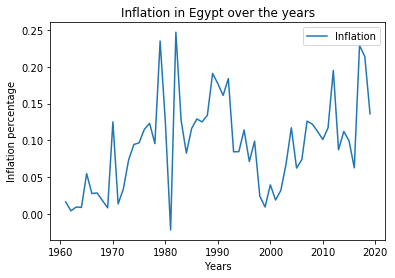

In [40]:
egy.plot(x = "Year", y = "Inflation", kind = "line")
plt.title("Inflation in Egypt over the years")
plt.xlabel("Years")
plt.ylabel("Inflation percentage");

### From the above plot, we can see how the inflation changed and how events like those happened in 1981 led to a disruptive trend in inflation this year.

<a id='conclusions'></a>
## Conclusions
##### In Earth, we have countries with less than 1000 citizens and I am here talking about the Vatican, We also have countries with +1 billion citizens and I am talking about China and India.
##### Surprise facts that countries with the highest Income are not neither US, Uk, or Germany, rather it is Qatar and Luxemburg.
#### Our results show that the income neither gets affected by the population nor the inflation. It also shows that suicide is not driven by population or inflation


In [41]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0